In [1]:
# Adding the tf-idf weighting to the model
import ImageRepresentation
from rsift_extraction import _GetSingleImageFeature
import numpy as np
import cv2 as cv
import os
from delf import feature_io
from ThesisToolkit import FeaturesIOToolkit as featuresIO
%matplotlib inline
from matplotlib import pyplot as plt 
from matplotlib import image as img
query_dir = "/mnt/datasets/daejeon_sv_v1_query_delf/"
query_images_dir = "/mnt/datasets/daejeon_sv_v1_query_full/"
database_dir = "/mnt/datasets/daejeon_sv_v1_bow50k_delf/"
database_features_dir = "/mnt/datasets/daejeon_sv_v1_delf/"
image_dir = "/mnt/datasets/daejeon_sv_v1/"
saved_model = "/mnt/datasets/codebook/delf_50k_model.pkl"

/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [2]:
ir = ImageRepresentation.ImageRepresentation(name = 'delf_bow', saved_model = saved_model )
print(ir.codebook.cluster_centers_.shape)

(50000, 40)


In [3]:
# Load all features to a list
 _, _, descriptors_list = featuresIO.DelfReadDirectory(database_features_dir)

W1022 14:09:55.417175 140558847809280 deprecation.py:323] From /home/canhld/workplace/models/research/delf/delf/python/feature_io.py:171: FastGFile.__init__ (from tensorflow.python.platform.gfile) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.gfile.GFile.


Loading DELF features
Load 9574 features


In [4]:
# Get the cluster index for all features in the database
all_features = np.concatenate(descriptors_list, axis = 0)
all_features_indexes = ir.codebook.predict(all_features)

In [5]:
# Get the histogram of the codebook, i.e how many features in each cluster
hist_database_features,_ = np.histogram(all_features_indexes, bins = range(ir.codebook.cluster_centers_.shape[0] + 1))
print(hist_database_features.shape)

(50000,)


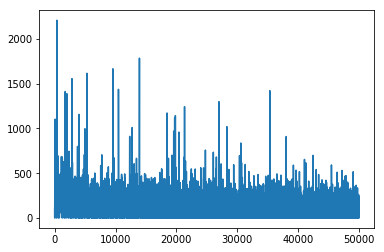

(2207,)


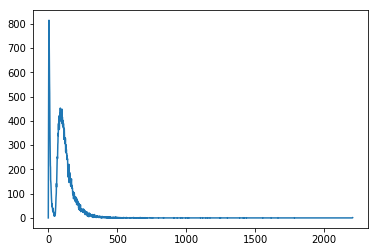

In [6]:
plt.plot(hist_database_features)
plt.show()
max_num = np.max(hist_database_features)
clusters_center_pdf,_ = np.histogram(hist_database_features, bins = range(max_num+1))
print(clusters_center_pdf.shape)
plt.plot(clusters_center_pdf)

In [ ]:
# TF-IDF vector calculation


In [7]:
saved_model_vlad = "/mnt/datasets/codebook/delf_256_model.pkl"
ir_vlad = ImageRepresentation.ImageRepresentation(name='delf_vald', saved_model=saved_model_vlad)
print(ir_vlad.codebook.cluster_centers_.shape)
all_features_indexes_vlad = ir_vlad.codebook.predict(all_features)

(256, 40)


(256,)


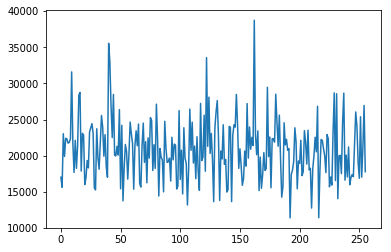

(38731,)


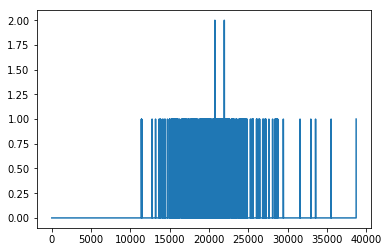

In [8]:
# Get the histogram of the codebook, i.e how many features in each cluster
hist_database_features_vlad,_ = np.histogram(all_features_indexes_vlad, bins = range(ir_vlad.codebook.cluster_centers_.shape[0] + 1))
print(hist_database_features_vlad.shape)
plt.plot(hist_database_features_vlad)
plt.show()
max_num_vlad = np.max(hist_database_features_vlad)
clusters_center_vlad_pdf,_ = np.histogram(hist_database_features_vlad, bins = range(max_num_vlad+1))
print(clusters_center_vlad_pdf.shape)
plt.plot(clusters_center_vlad_pdf)